# Начало работы с "Меланома родинки"

In [2]:
import csv
from isic_api import ISICApi
#Insert Username and Password Below
with open('data_login.txt') as f:
    name, password = f.readline().split(',')
api = ISICApi(username=name, password=password)

### image metadata

get image short data

In [7]:
print('count of all data: ', len(api.getJson('image?limit=0&offset=0&sort=name')))

count of all data:  23906


In [9]:
imageList = api.getJson('image?limit=100&offset=0&sort=name')
imageList[0:4]

[{'_id': '5436e3abbae478396759f0cf',
  'name': 'ISIC_0000000',
  'updated': '2015-02-23T02:48:17.495000+00:00'},
 {'_id': '5436e3acbae478396759f0d1',
  'name': 'ISIC_0000001',
  'updated': '2015-02-23T02:48:27.455000+00:00'},
 {'_id': '5436e3acbae478396759f0d3',
  'name': 'ISIC_0000002',
  'updated': '2015-02-23T02:48:37.249000+00:00'},
 {'_id': '5436e3acbae478396759f0d5',
  'name': 'ISIC_0000003',
  'updated': '2015-02-23T02:48:46.021000+00:00'}]

get metadata from image

In [10]:
print('Fetching metadata for %s images' % len(imageList))
imageDetails = []
for image in imageList:
    print(' ', image['name'], end=', ')
    # Fetch the full image details
    imageDetail = api.getJson('image/%s' % image['_id'])
    imageDetails.append(imageDetail)


Fetching metadata for 100 images
  ISIC_0000000,   ISIC_0000001,   ISIC_0000002,   ISIC_0000003,   ISIC_0000004,   ISIC_0000005,   ISIC_0000006,   ISIC_0000007,   ISIC_0000008,   ISIC_0000009,   ISIC_0000010,   ISIC_0000011,   ISIC_0000012,   ISIC_0000013,   ISIC_0000014,   ISIC_0000015,   ISIC_0000016,   ISIC_0000017,   ISIC_0000018,   ISIC_0000019,   ISIC_0000020,   ISIC_0000021,   ISIC_0000022,   ISIC_0000023,   ISIC_0000024,   ISIC_0000025,   ISIC_0000026,   ISIC_0000027,   ISIC_0000028,   ISIC_0000029,   ISIC_0000030,   ISIC_0000031,   ISIC_0000032,   ISIC_0000033,   ISIC_0000034,   ISIC_0000035,   ISIC_0000036,   ISIC_0000037,   ISIC_0000038,   ISIC_0000039,   ISIC_0000040,   ISIC_0000041,   ISIC_0000042,   ISIC_0000043,   ISIC_0000044,   ISIC_0000045,   ISIC_0000046,   ISIC_0000047,   ISIC_0000048,   ISIC_0000049,   ISIC_0000050,   ISIC_0000051,   ISIC_0000052,   ISIC_0000053,   ISIC_0000054,   ISIC_0000055,   ISIC_0000056,   ISIC_0000057,   ISIC_0000058,   ISIC_0000059,   ISIC_

get ['meta']['clinical'] fields name

In [11]:

# Determine the union of all image metadata fields
metadataFields = set(
    field
    for imageDetail in imageDetails
    for field in imageDetail['meta']['clinical'].keys()
)
metadataFields = ['isic_id'] + sorted(metadataFields)

all metadata 

In [17]:
imageDetail

{'_id': '5436e3b8bae478396759f197',
 '_modelType': 'image',
 'created': '2014-10-09T19:36:24.982000+00:00',
 'creator': {'_id': '5450e996bae47865794e4d0d', 'name': 'User 6VSN'},
 'dataset': {'_accessLevel': -1,
  '_id': '5a2ecc5e1165975c945942a2',
  'description': 'Moles and melanomas.\nBiopsy-confirmed melanocytic lesions. Both malignant and benign lesions are included.',
  'license': 'CC-0',
  'name': 'UDA-1',
  'updated': '2014-11-10T02:39:56.492000+00:00'},
 'meta': {'acquisition': {'image_type': 'dermoscopic',
   'pixelsX': 2048,
   'pixelsY': 1536},
  'clinical': {'age_approx': None,
   'benign_malignant': 'benign',
   'diagnosis': 'nevus',
   'diagnosis_confirm_type': None,
   'melanocytic': True,
   'sex': None},
  'unstructured': {'diagnosis': 'nevus nos', 'id1': '101', 'site': 'nap'},
  'unstructuredExif': {}},
 'name': 'ISIC_0000099',
 'notes': {'reviewed': {'accepted': True,
   'time': '2014-11-10T02:39:56.492000+00:00',
   'userId': '5436c6e7bae4780a676c8f93'},
  'tags': [

save metadata

In [27]:
outputFileName = 'imagedata'

# Write the metadata to a CSV
print('Writing metadata to CSV: %s' % outputFileName+'.csv')
with open(outputFileName+'.csv', 'w') as outputStream:
    csvWriter = csv.DictWriter(outputStream, metadataFields)
    csvWriter.writeheader()
    for imageDetail in imageDetails:
        rowDict = imageDetail['meta']['clinical'].copy()
        rowDict['isic_id'] = imageDetail['name']
        csvWriter.writerow(rowDict)

Writing metadata to CSV: imagedata.csv


saved metafields

In [12]:
metadataFields

['isic_id',
 'age_approx',
 'anatom_site_general',
 'benign_malignant',
 'diagnosis',
 'diagnosis_confirm_type',
 'melanocytic',
 'sex']

### download image

In [15]:
import urllib
import os

# Initialize the API; no login is necessary for public data
savePath = 'ISICArchive/'

if not os.path.exists(savePath):
    os.makedirs(savePath)

imageList = api.getJson('image?limit=10&offset=0&sort=name')

print('Downloading %s images' % len(imageList))
imageDetails = []
for image in imageList:
    print(image['_id'], end=', ')
    imageFileResp = api.get('image/%s/download' % image['_id'])
    imageFileResp.raise_for_status()
    imageFileOutputPath = os.path.join(savePath, '%s.jpg' % image['name'])
    with open(imageFileOutputPath, 'wb') as imageFileOutputStream:
        for chunk in imageFileResp:
            imageFileOutputStream.write(chunk)


5436e3abbae478396759f0cf, 5436e3acbae478396759f0d1, 5436e3acbae478396759f0d3, 5436e3acbae478396759f0d5, 5436e3acbae478396759f0d7, 5436e3acbae478396759f0d9, 5436e3acbae478396759f0db, 5436e3acbae478396759f0dd, 5436e3acbae478396759f0df, 5436e3acbae478396759f0e1, 

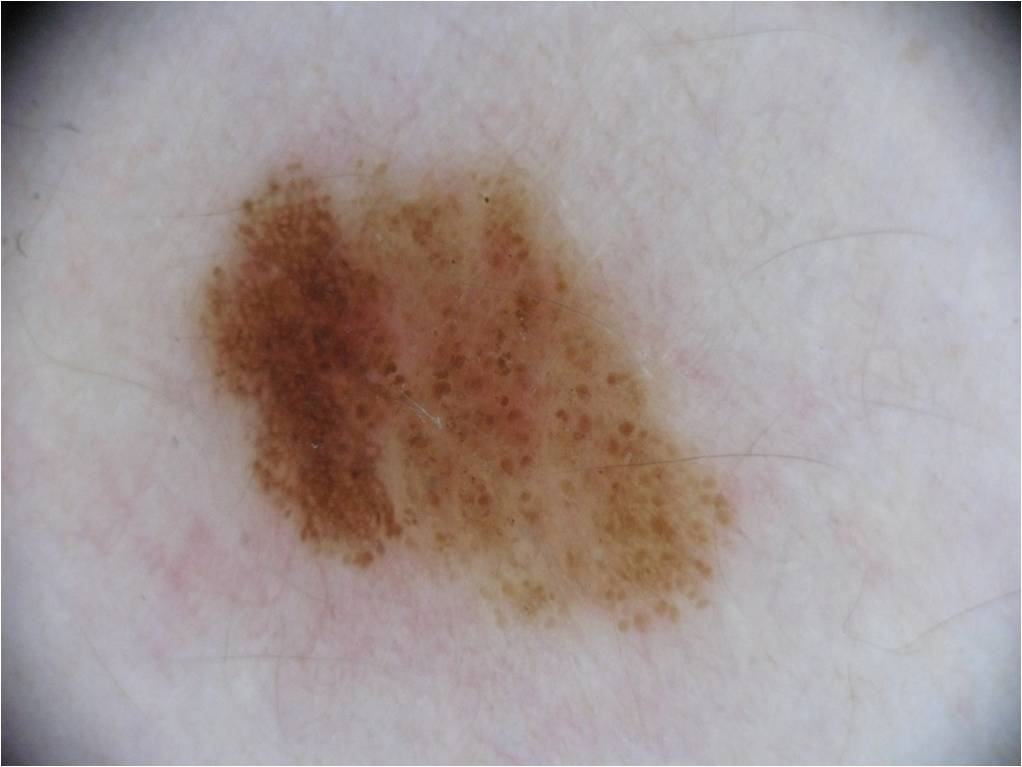

In [16]:
from IPython.display import Image
Image(filename=imageFileOutputPath) 

### study

In [36]:
import pandas as pd

# Initialize the API; no login is necessary for public data
outputFileName = 'imagedata'
studyData = api.getJson('study/573f11119fc3c132505c0ee7')
studyData_images = pd.DataFrame(studyData['images'])
studyData_images.to_csv('studyDataImages.csv')

studyList = api.getJson('study?limit=50&state=complete')
studyList

[{'_id': '573f11119fc3c132505c0ee7',
  'description': '',
  'name': 'ISBI 2016: 100 Lesion Classification',
  'updated': '2016-11-08T10:25:45.485000+00:00'},
 {'_id': '5a32cde91165975cf58a469c',
  'description': '',
  'name': 'ISIC Annotation Study - All Features',
  'updated': '2017-12-14T19:15:53.898000+00:00'}]

### Segmentations 
lining of black/white img

In [37]:
# Get List of Image Segmentations
imageId = '5436e3abbae478396759f0cf' #Using image ISIC_0000000 as example
imageSegmentationData = api.getJson('segmentation?imageId='+imageId)
print(imageSegmentationData)
# Get Details for a Segmentation
segmentationId = '5463934bbae47821f88025ad' #Using image ISIC_0000000 as example
segmentationData = api.getJson('segmentation/'+segmentationId)
print(segmentationData)

[{'_id': '5463934bbae47821f88025ad', 'created': '2014-11-12T17:05:15.624000+00:00', 'failed': False, 'skill': 'expert'}]
{'_id': '5463934bbae47821f88025ad', 'created': '2014-11-12T17:05:15.624000+00:00', 'creator': {'_id': '5450e996bae47865794e4d0d', 'name': 'User 6VSN'}, 'failed': False, 'imageId': '5436e3abbae478396759f0cf', 'meta': {'source': 'autofill', 'startTime': '2014-11-12T17:02:19.605000+00:00', 'stopTime': '2014-11-12T17:03:12.156000+00:00'}, 'reviews': [{'approved': True, 'skill': 'novice', 'time': '2014-11-12T17:05:15.624000+00:00', 'userId': '5450e996bae47865794e4d0d'}, {'approved': True, 'skill': 'expert', 'time': '2015-02-23T02:02:08.162000+00:00', 'userId': '54cb967ebae47819d8e4c724'}]}


In [40]:
# Download Segmentation Mask
savePath = 'ISICArchive/segmentation/'

if not os.path.exists(savePath):
    os.makedirs(savePath)

imageId = '5436e3abbae478396759f0cf'
segmentationList = api.getJson('segmentation?imageId='+imageId)

print('Downloading %s images' % len(segmentationList))

for segmentation in segmentationList:
    print(segmentation['_id'])
    imageFileResp = api.get('segmentation/%s/mask' % segmentation['_id'])
    imageFileResp.raise_for_status()
    imageFileOutputPath = os.path.join(savePath, '%s_segmentationMask.jpg' % segmentation['_id'])
    with open(imageFileOutputPath, 'wb') as imageFileOutputStream:
        for chunk in imageFileResp:
            imageFileOutputStream.write(chunk)

5463934bbae47821f88025ad


### Annotations


In [45]:
# Get List of Annotations

studyList = api.getJson('study?limit=50&state=complete')
selectedStudy = studyList[1]['_id'] #Just an example. Can also use selectedStudy = 'INSERT STUDY ID'
listOfStudyAnnotations = api.getJson('annotation?studyId='+selectedStudy)
selectedStudy, listOfStudyAnnotations[:5]

('5a32cde91165975cf58a469c',
 [{'_id': '5a32cde91165975cf58a469e',
   'imageId': '54e755f8bae47850e86ce012',
   'state': 'complete',
   'studyId': '5a32cde91165975cf58a469c',
   'userId': '578e64b09fc3c10d6fd12e4f'},
  {'_id': '5a32cde91165975cf58a469f',
   'imageId': '54e755fdbae47850e86ce058',
   'state': 'complete',
   'studyId': '5a32cde91165975cf58a469c',
   'userId': '578e64b09fc3c10d6fd12e4f'},
  {'_id': '5a32cde91165975cf58a46a0',
   'imageId': '54e755febae47850e86ce05d',
   'state': 'complete',
   'studyId': '5a32cde91165975cf58a469c',
   'userId': '578e64b09fc3c10d6fd12e4f'},
  {'_id': '5a32cde91165975cf58a46a1',
   'imageId': '54e75604bae47850e86ce0bc',
   'state': 'complete',
   'studyId': '5a32cde91165975cf58a469c',
   'userId': '578e64b09fc3c10d6fd12e4f'},
  {'_id': '5a32cde91165975cf58a46a2',
   'imageId': '54e75608bae47850e86ce0ee',
   'state': 'complete',
   'studyId': '5a32cde91165975cf58a469c',
   'userId': '578e64b09fc3c10d6fd12e4f'}])

In [46]:
# Get Details of Annotations

annotationId = listOfStudyAnnotations[0]['_id']
annotationDetails = api.getJson('annotation/'+annotationId)
annotationDetails

{'_id': '5a32cde91165975cf58a469e',
 '_modelType': 'annotation',
 'image': {'_id': '54e755f8bae47850e86ce012',
  'name': 'ISIC_0001115',
  'updated': '2015-12-03T18:05:41.574000+00:00'},
 'log': [],
 'markups': {'Globules / Clods : Lacunae : Red': True,
  'Shiny white structures : Shiny white blotches and strands': True},
 'responses': {'Benign or Malignant': 'Benign',
  'Confidence Level': 'Somewhat Confident'},
 'startTime': '2018-01-04T19:41:10.193000+00:00',
 'state': 'complete',
 'status': 'ok',
 'stopTime': '2018-01-04T19:43:41.448000+00:00',
 'studyId': '5a32cde91165975cf58a469c',
 'user': {'_id': '578e64b09fc3c10d6fd12e4f', 'name': 'User 6YB2'}}